# 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 단순선형회귀 모델 만들기

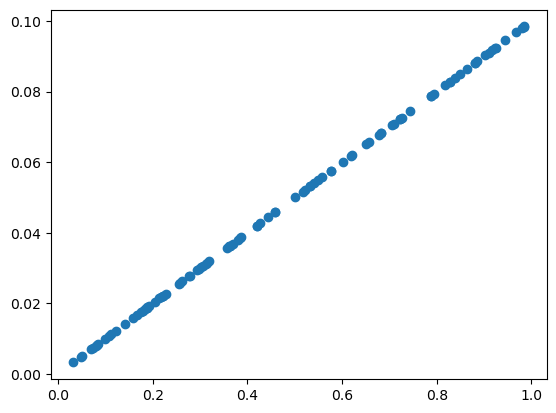

In [2]:
X = np.random.rand(100)
y = 0.2 * X * 0.5 #ax+b

plt.scatter(X,y)

In [3]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [4]:
# 경사하강법 y=wX+b, w결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5  #임의 값

Epoch 0, W: 0.9868, Error:0.5812


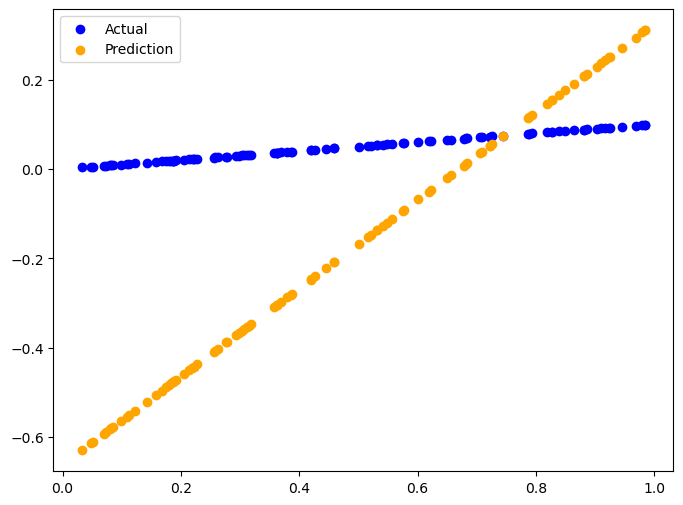

Epoch 10, W: 0.7962, Error:0.1827


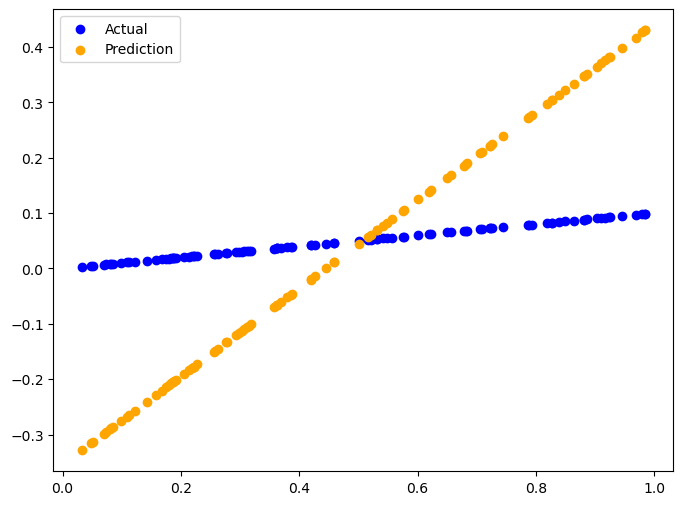

Epoch 20, W: 0.5987, Error:0.1309


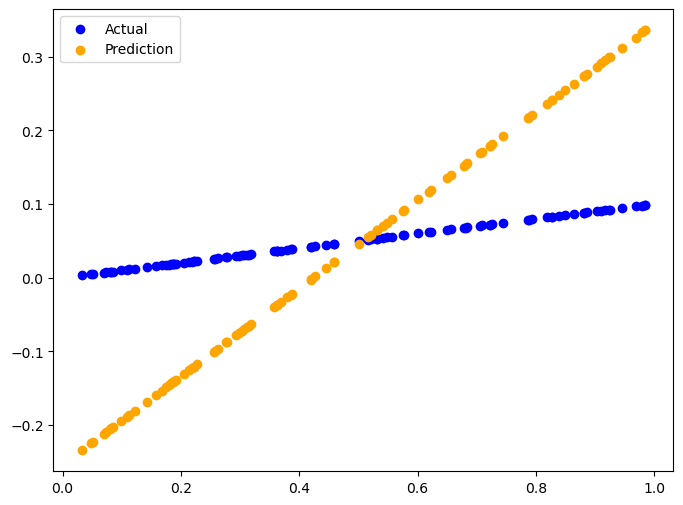

Epoch 30, W: 0.4573, Error:0.0938


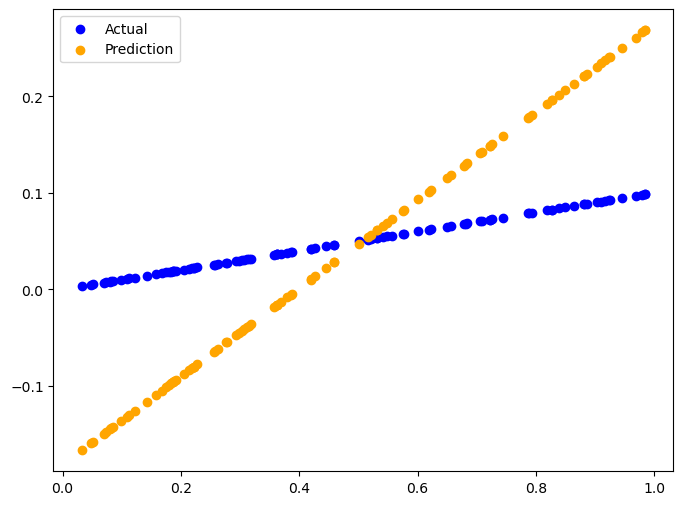

Epoch 40, W: 0.3560, Error:0.0672


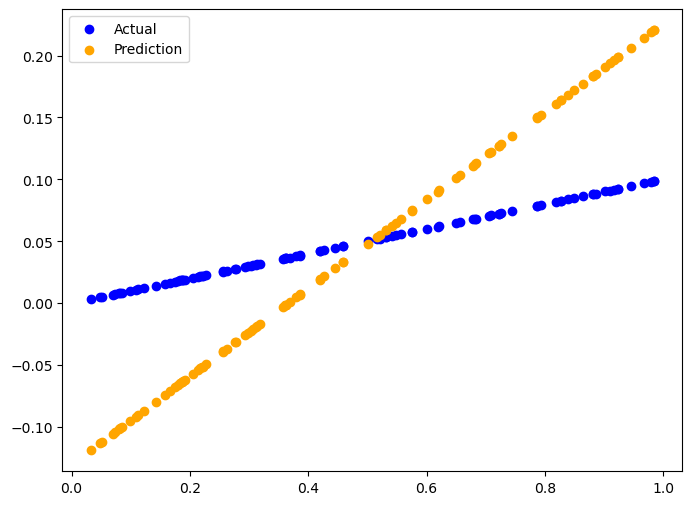

Epoch 50, W: 0.2834, Error:0.0481


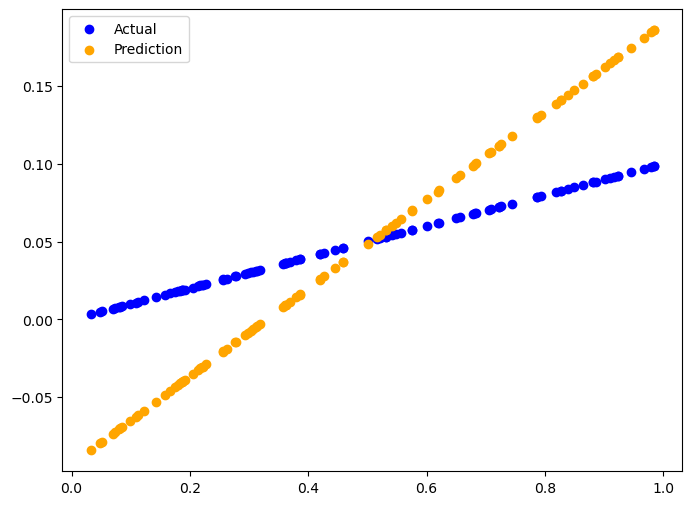

Epoch 60, W: 0.2314, Error:0.0345


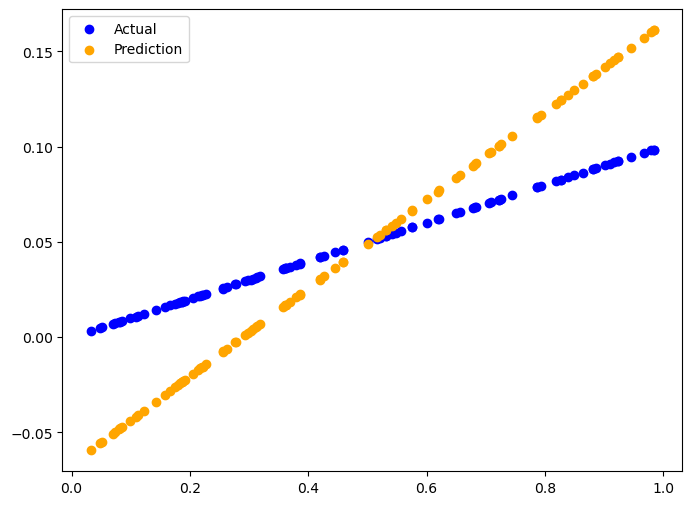

Epoch 70, W: 0.1941, Error:0.0247


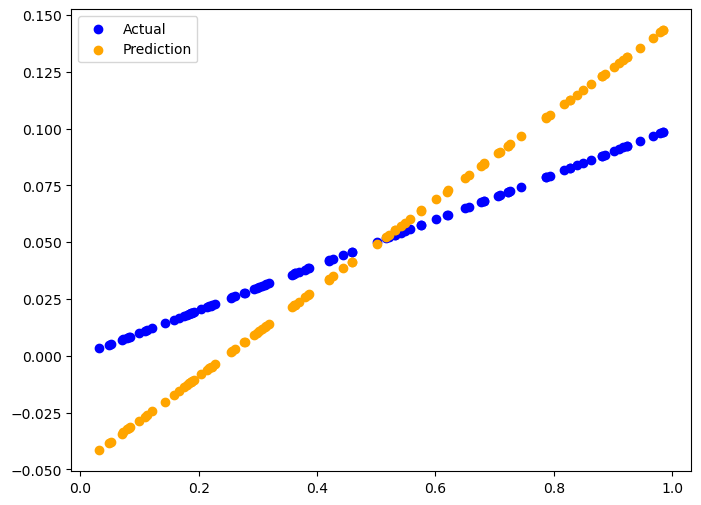

Epoch 80, W: 0.1674, Error:0.0177


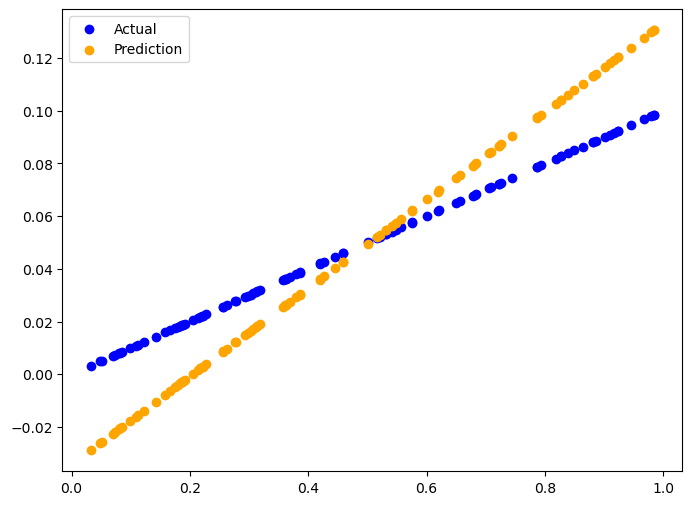

Epoch 90, W: 0.1483, Error:0.0127


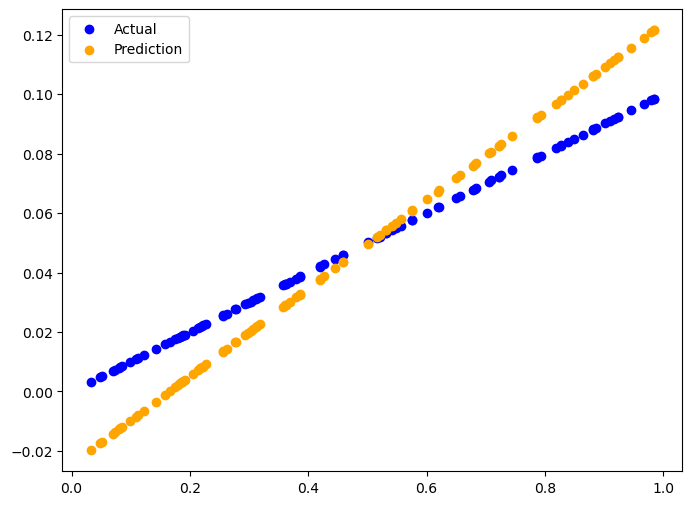

In [5]:
for epoch in range(100):
    y_pred = W * X + b
    error = np.abs(y_pred - y).mean() #손실함수
    if error < 0.001: #0에 가깝게
        break
    W_descent = learning_rate * ((y_pred - y)*X).mean()
    b_descent = learning_rate * ((y_pred - y).mean())
    W = W - W_descent
    b = b - b_descent
    
    if epoch%10 == 0:
        print(f'Epoch {epoch}, W: {W:.4f}, Error:{error:.4f}')
        y_pred = W * X + b
        plt_prediction(y_pred, y)
        

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
bostonDF = pd.read_csv('abc/data/boston.csv')
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [8]:
X = bostonDF.drop('target', axis=1).values 
y = bostonDF['target'].values
bostonDF.shape

(506, 14)

In [9]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train) #학습 
y_pred = lr.predict(X_test) #예측
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [11]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse #실제오차

(np.float64(4.158956107955702), np.float64(17.29691590790204))

In [12]:
# 결정계수
r2_score(y_test, y_pred)

np.float64(0.7572263323138937)

In [13]:
# 회귀식
# W1, W0
lr.intercept_, lr.coef_

(np.float64(40.995595172164634),
 array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]))

y= w0 + w1*X1 + w2*X2 + ... w13*X13

In [14]:
np.round(lr.intercept_, 1), np.round(lr.coef_, 1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [15]:
pd.Series(data=np.round(lr.coef_,1), 
          index=bostonDF.drop('target', axis=1).columns).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [16]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [17]:
# MSE, RMSE
RMSE = np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE


(np.float64(5.828658946215827),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [18]:
# R2
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
np.mean(r2_scores),r2_scores

(np.float64(0.3532759243958805),
 array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]))

오차는 커지고 (4.15 → 5.82), 결정계수는 작아졌다 (0.75 → 0.35)

# 다항회귀모델

y = w0 + w1 x 1 + w2 x 2 + w3 x 1^2 + w4 x 2^2

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [21]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(15.555752315293555)

In [22]:
poly_r2 = r2_score(y_test, pred_poly)
poly_r2

np.float64(0.7816647162240546)

2차 ~ 5차 다항회귀 시뮬레이션

In [23]:
results = []
best_score = -np.inf  # R2는 높을수록 좋음
best_model = None # 여기에 저장

results = []
for degree in range(1,5):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())]
    )
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_test)
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred_poly)
    
    results.append({'degree': degree,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2': r2})
    
    
    if r2 > best_score:
        best_score = r2
        best_model = model_poly
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,17.296916,4.158956,0.757226
1,2,15.555752,3.944078,0.781665
2,3,79625.593716,282.180073,-1116.597931
3,4,170599.948640,413.037466,-2393.483240


In [24]:
best_model.named_steps['poly'].degree

2

In [25]:
df_results = pd.DataFrame(results)
best_row = df_results.loc[df_results['R2'].idxmax()]  # R² 최고 행
print("최적 degree:", best_row['degree'])
print("최고 R²:", best_row['R2'])


최적 degree: 2.0
최고 R²: 0.7816647162240546


## best model 수치
최적 degree: 2.0
최고 R²: 0.7816647162240546

In [26]:
df_results = pd.DataFrame(results)


## 차수 vs 성능 시각화 (R², MSE, RMSE)

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글
mpl.rc('font', family='Malgun Gothic')

# 음수
mpl.rcParams['axes.unicode_minus'] = False

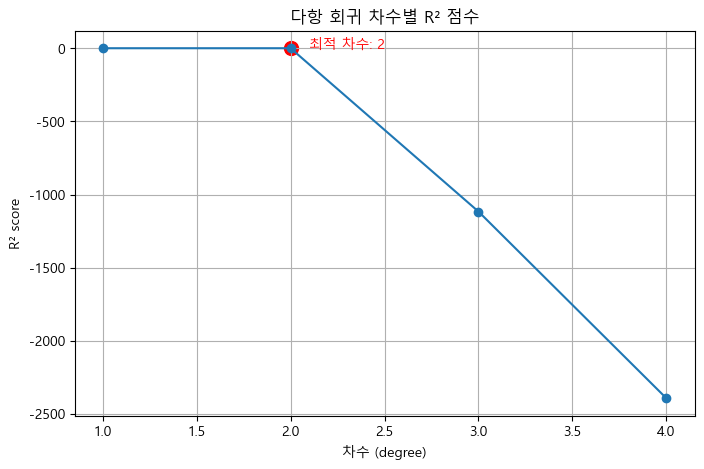

In [28]:
# R² 점수 변화 시각화

# 최적 degree와 그때의 R² 값 구하기
best_row = df_results.loc[df_results['R2'].idxmax()]
best_degree = best_row['degree']
best_r2 = best_row['R2']

plt.figure(figsize=(8, 5))
plt.plot(df_results['degree'], df_results['R2'], marker='o')

# 최적 점수 위치 표시
plt.scatter(best_degree, best_r2, color='red', s=100, label='최적 차수')  # 강조 점
plt.text(best_degree + 0.1, best_r2, f"최적 차수: {int(best_degree)}", color='red') # 강조 텍스트

plt.title('다항 회귀 차수별 R² 점수')
plt.xlabel('차수 (degree)')
plt.ylabel('R² score')
plt.grid(True)
plt.show()


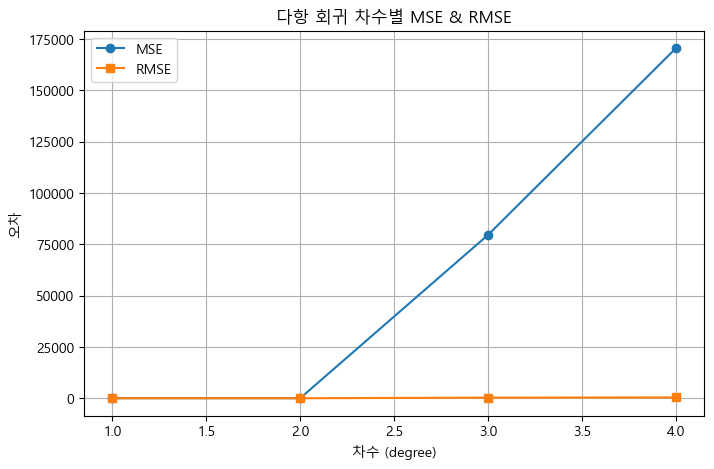

In [29]:
# MSE & RMSE 비교

plt.figure(figsize=(8, 5))
plt.plot(df_results['degree'], df_results['MSE'], marker='o', label='MSE')
plt.plot(df_results['degree'], df_results['RMSE'], marker='s', label='RMSE')
plt.title('다항 회귀 차수별 MSE & RMSE')
plt.xlabel('차수 (degree)')
plt.ylabel('오차')
plt.legend()
plt.grid(True)
plt.show()


# 규제 회귀 모델

In [30]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [31]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred_ridge)
r2 = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(17.2068333161771), np.float64(0.7584907011357218))

## 다항 회귀 모델 : 15.5 , 0.78
## 규제 회귀 모델 : 17.20 , 0.75

In [32]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv mse : {ridge_mse:4f}, r2: {ridge_r2:4f}')

ridge cv mse : 17.296260, r2: 0.757236


### ridge cv mse : 17.296260, r2: 0.757236

In [33]:
ridge_cv.alpha_

np.float64(0.001)

### Lasso alpha = 0.1


### LassoCV


In [34]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
Lasso_cv = LassoCV(alphas=alphas, cv=5)
Lasso_cv.fit(X_train, y_train)
Lasso_preds = Lasso_cv.predict(X_test)
Lasso_mse = mean_squared_error(y_test, Lasso_preds)
Lasso_r2 = r2_score(y_test, Lasso_preds)
print(f'Lasso cv mse : {Lasso_mse:4f}, r2: {Lasso_r2:4f}')

Lasso cv mse : 17.283109, r2: 0.757420


### [개선 Lasso] 최적 alpha: 0.001
### Lasso cv mse : 17.283109, r2: 0.757420

In [35]:
Lasso_cv.coef_

array([-1.12661593e-01,  6.56008407e-02,  3.30878096e-02,  3.02619848e+00,
       -1.94682482e+01,  3.35481221e+00,  5.71239360e-03, -1.73664047e+00,
        3.55109529e-01, -1.43215477e-02, -9.16008532e-01,  1.04167858e-02,
       -5.66946541e-01])

In [36]:
ridge_cv.coef_

array([-1.12963267e-01,  6.55168621e-02,  3.43623266e-02,  3.04560180e+00,
       -1.97781295e+01,  3.35506472e+00,  5.92317536e-03, -1.74158450e+00,
        3.55842743e-01, -1.42968313e-02, -9.19951783e-01,  1.03976785e-02,
       -5.66214215e-01])

Lasso 모델에서 제거된 변수는 없다.

## 엘라스틱넷

In [37]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)
enet_pred = enet.predict(X_test)
enet_r2 = r2_score(y_test, Lasso_preds)
print("[엘라스틱넷 회귀]")
print("MSE:", mean_squared_error(y_test, enet_pred))
print("R2:", r2_score(y_test, enet_pred))


[엘라스틱넷 회귀]
MSE: 18.11673827943617
R2: 0.7457195824951277


### [엘라스틱넷 회귀]
MSE: 18.11673827943617
R2: 0.7457195824951277

# 모델 성능 비교

In [38]:
results = pd.DataFrame({
    '모델' : ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
    'MSE' : [mean_squared_error(y_test, pred_poly),
             mean_squared_error(y_test, ridge_preds),
             mean_squared_error(y_test, Lasso_preds),
             mean_squared_error(y_test, enet_pred)],
    'r2' : [poly_r2, ridge_r2, Lasso_r2, enet_r2]
})

results

,모델,MSE,r2
0,다항회귀,170599.948640,0.781665
1,릿지회귀,17.296260,0.757236
2,라쏘회귀,17.283109,0.757420
3,엘라스틱넷회귀,18.116738,0.757420


In [49]:
best_row = results.loc[results['r2'].idxmax()]

print("최고 성능 모델:", best_row['모델'])
print(f"최고 R² 점수:", best_row['r2'].round(2))
print(f"MSE:", best_row['MSE'].round(2))


최고 성능 모델: 다항회귀
최고 R² 점수: 0.78
MSE: 170599.95
